# Monitor fields on each side of a box

This is a basic Tidy3D script showing the FDTD simulation of a delectric cube in the presence of a point dipole, showing how to measure fields on each of the six sides of a given box.

In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pylab as plt

import tidy3d as td
import tidy3d.web as web

Using Tidy3D credentials from stored file


In [2]:
# set up parameters of simulation
dl=0.01
pml = td.PML(num_layers=10)
sim_size = [4, 4, 4]
lambda0 = 1.0
freq0 = td.C_0 / lambda0
fwidth = freq0 / 10.0
run_time = 10.0 / fwidth

# create structure
dielectric = td.Medium.from_nk(n=2, k=0, freq=freq0)
square = td.Structure(
    geometry=td.Box(center=[0, 0, 0], size=[1.5, 1.5, 1.5]),
    medium=dielectric)

# create source
source = td.VolumeSource(
    center=(-1.5, 0, 0),
    size=(0, 0.4, 0.4),
    source_time = td.GaussianPulse(
        freq0=freq0,
        fwidth=fwidth),
    polarization='Ey')


Create frequency- and time-domain monitors using the surfaces() function and also manually, for comparison.

In [3]:
# Monitor settings
mon_size = (2.0, 3.0, 1.0)
mon_center = (0, 0.5, 1.0)

# Create the frequency-domain box monitor

monitor_freq = td.FieldMonitor(
    fields=['Ex', 'Ey', 'Hz'],
    center=mon_center,
    size=mon_size,
    freqs=[freq0],
    name='field_freq')

# Create the time-domain box monitor

monitor_time = td.FieldTimeMonitor(
    fields=['Ex', 'Ey', 'Hz'],
    center=mon_center,
    size=mon_size,
    start=1e-13,
    stop=2e-13,
    interval=200,
    name='field_time')

# Create some surface monitors manually for testing FieldMonitor.surfaces()
monitor_xm = td.FieldMonitor(
    fields=['Ex', 'Ey', 'Hz'],
    center=(mon_center[0]-mon_size[0]/2.0, mon_center[1], mon_center[2]),
    size=(0, mon_size[1], mon_size[2]),
    freqs=[freq0],
    name='test_freq_x-')

monitor_xp = td.FieldMonitor(
    fields=['Ex', 'Ey', 'Hz'],
    center=(mon_center[0]+mon_size[0]/2.0, mon_center[1], mon_center[2]),
    size=(0, mon_size[1], mon_size[2]),
    freqs=[freq0],
    name='test_freq_x+')

monitor_ym = td.FieldMonitor(
    fields=['Ex', 'Ey', 'Hz'],
    center=(mon_center[0], mon_center[1]-mon_size[1]/2.0, mon_center[2]),
    size=(mon_size[0], 0, mon_size[2]),
    freqs=[freq0],
    name='test_freq_y-')

# Create some surface monitors manually for testing FieldTimeMonitor.surfaces()
monitor_yp = td.FieldTimeMonitor(
    fields=['Ex', 'Ey', 'Hz'],
    center=(mon_center[0], mon_center[1]+mon_size[1]/2.0, mon_center[2]),
    size=(mon_size[0], 0, mon_size[2]),
    start=1e-13,
    stop=2e-13,
    interval=200,
    name='test_time_y+')

monitor_zm = td.FieldTimeMonitor(
    fields=['Ex', 'Ey', 'Hz'],
    center=(mon_center[0], mon_center[1], mon_center[2]-mon_size[2]/2.0),
    size=(mon_size[0], mon_size[1], 0),
    start=1e-13,
    stop=2e-13,
    interval=200,
    name='test_time_z-')

monitor_zp = td.FieldTimeMonitor(
    fields=['Ex', 'Ey', 'Hz'],
    center=(mon_center[0], mon_center[1], mon_center[2]+mon_size[2]/2.0),
    size=(mon_size[0], mon_size[1], 0),
    start=1e-13,
    stop=2e-13,
    interval=200,
    name='test_time_z+')

# Get a list of frequency-domain monitors for each surface of the box
all_monitors = monitor_freq.surfaces()

# Append the list of time-domain monitors for each surface of the box
all_monitors.extend(monitor_time.surfaces())

# Append the manually-defined monitors (which are just for testing) to the list of all monitors
all_monitors.extend([monitor_xm, monitor_xp, monitor_ym, monitor_yp, monitor_zm, monitor_zp])


Initialize the simulation and plot a couple monitors for testing

/Users/shashwat/Documents/flexcompute/repos/venvs/tidy3d-env/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


<AxesSubplot:title={'center':'cross section at x=-1.00'}, xlabel='y', ylabel='z'>

<Figure size 432x288 with 1 Axes>

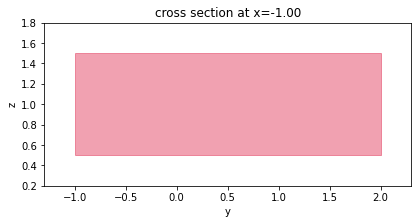

<Figure size 432x288 with 1 Axes>

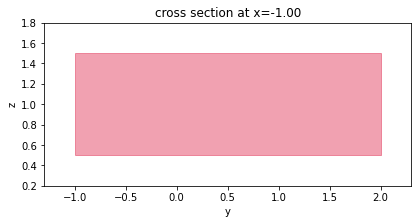

In [4]:
# Initialize simulation
sim = td.Simulation(size=sim_size,
                    grid_size=(dl, dl, dl),
                    structures=[square],
                    sources=[source],
                    monitors=all_monitors,
                    run_time=run_time,
                    pml_layers=(pml, pml, pml))

# Compare a surface monitor that was extracted from the box, to the corresponding manually-defined one
all_monitors[0].plot(x=mon_center[0]-mon_size[0]/2.0)
monitor_xm.plot(x=mon_center[0]-mon_size[0]/2.0)


In [5]:
# Run the simulation
data = web.run(sim, task_name='surface_monitors', path='data/data.hdf5')
# data = web.load('8c373057-df90-49eb-92d8-188b2bac9f36', sim, path='data/data.hdf5')


[15:46:09] INFO     Uploaded task 'surface_monitors' with task_id               ]8;id=872531;file:///Users/shashwat/Documents/flexcompute/repos/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=661802;file:///Users/shashwat/Documents/flexcompute/repos/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#109\109]8;;\
                    '1e0f1591-e31b-4370-b9da-d68278dc9dd7'.                                  

Output()

[15:46:10] status = queued                                                      ]8;id=990966;file:///Users/shashwat/Documents/flexcompute/repos/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=715819;file:///Users/shashwat/Documents/flexcompute/repos/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#201\201]8;;\

[15:46:18] status = preprocess                                                  ]8;id=329851;file:///Users/shashwat/Documents/flexcompute/repos/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=609506;file:///Users/shashwat/Documents/flexcompute/repos/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#201\201]8;;\

[15:46:45] status = running                                                     ]8;id=209185;file:///Users/shashwat/Documents/flexcompute/repos/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=86714;file:///Users/shashwat/Documents/flexcompute/repos/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#201\201]8;;\

[15:54:22] status = postprocess                                                 ]8;id=420528;file:///Users/shashwat/Documents/flexcompute/repos/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=675734;file:///Users/shashwat/Documents/flexcompute/repos/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#201\201]8;;\

[15:54:56] status = visualize                                                   ]8;id=240951;file:///Users/shashwat/Documents/flexcompute/repos/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=862865;file:///Users/shashwat/Documents/flexcompute/repos/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#201\201]8;;\

[15:55:08] status = success                                                     ]8;id=927162;file:///Users/shashwat/Documents/flexcompute/repos/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=392718;file:///Users/shashwat/Documents/flexcompute/repos/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#201\201]8;;\

[15:55:09] INFO     downloading file "monitor_data.hdf5" to "data/data.hdf5"    ]8;id=420232;file:///Users/shashwat/Documents/flexcompute/repos/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=352242;file:///Users/shashwat/Documents/flexcompute/repos/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#476\476]8;;\

Output()

[15:59:02] INFO     loading SimulationData from data/data.hdf5                  ]8;id=263531;file:///Users/shashwat/Documents/flexcompute/repos/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=54294;file:///Users/shashwat/Documents/flexcompute/repos/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#306\306]8;;\

In [6]:
print(data.log)

Simulation domain Nx, Ny, Nz: [420, 420, 420]
Applied symmetries: (0, 0, 0)
Number of computational grid points: 7.4088e+07.
Using subpixel averaging: True
Number of time steps: 1.9247e+04
Automatic shutoff factor: 1.00e-05
Time step (s): 1.7332e-17
Compute source modes time (s):     0.0644
Compute monitor modes time (s):    0.0462

Rest of setup time (s):            0.7691

Starting solver...
- Time step    769 / time 1.33e-14s (  4 % done), field decay: 1.00e+00
- Time step   1531 / time 2.65e-14s (  7 % done), field decay: 1.00e+00
- Time step   1539 / time 2.67e-14s (  8 % done), field decay: 1.00e+00
- Time step   2309 / time 4.00e-14s ( 12 % done), field decay: 2.52e-01
- Time step   3079 / time 5.34e-14s ( 16 % done), field decay: 6.69e-02
- Time step   3849 / time 6.67e-14s ( 20 % done), field decay: 2.67e-02
- Time step   4619 / time 8.01e-14s ( 24 % done), field decay: 1.17e-02
- Time step   5389 / time 9.34e-14s ( 28 % done), field decay: 9.21e-03
- Time step   6159 / time 1

/Users/shashwat/Documents/flexcompute/repos/venvs/tidy3d-env/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/Users/shashwat/Documents/flexcompute/repos/venvs/tidy3d-env/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/Users/shashwat/Documents/flexcompute/repos/venvs/tidy3d-env/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/Users/shashwat/Documents/flexcompute/repos/venvs/tidy3d-env/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarnin

<Figure size 720x1296 with 24 Axes>

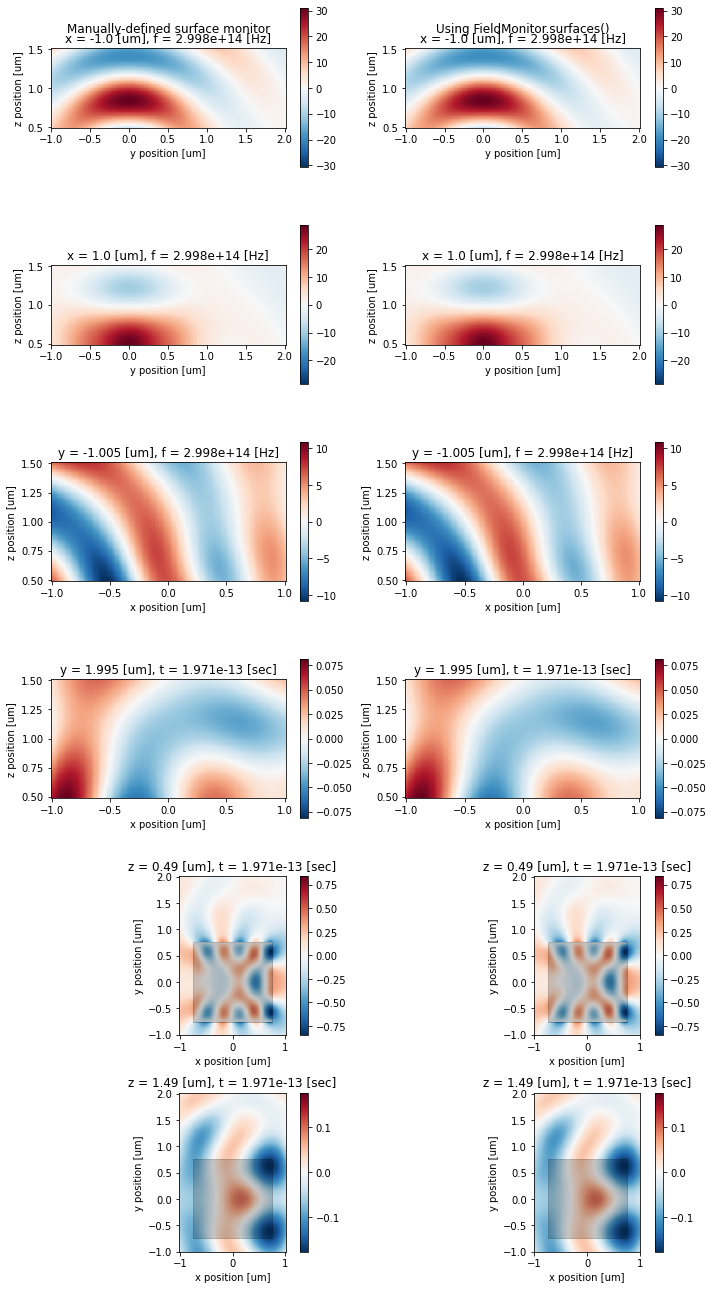

In [7]:
# Side-by-side comparison of fields on the "manual" and "automatic" monitors

fig, axs = plt.subplots(6, 2)
fig.set_size_inches(10, 18)

data.plot_field(field_monitor_name='test_freq_x-', field_name='Ey', x=-mon_size[0]/2.0, val='real', freq=freq0, ax=axs[0][0])
data.plot_field(field_monitor_name='field_freq_x-', field_name='Ey', x=-mon_size[0]/2.0, val='real', freq=freq0, ax=axs[0][1])

data.plot_field(field_monitor_name='test_freq_x+', field_name='Ey', x=mon_size[0]/2.0, val='real', freq=freq0, ax=axs[1][0])
data.plot_field(field_monitor_name='field_freq_x+', field_name='Ey', x=mon_size[0]/2.0, val='real', freq=freq0, ax=axs[1][1])

data.plot_field(field_monitor_name='test_freq_y-', field_name='Ey', y=-mon_size[1]/2.0, val='real', freq=freq0, ax=axs[2][0])
data.plot_field(field_monitor_name='field_freq_y-', field_name='Ey', y=-mon_size[1]/2.0, val='real', freq=freq0, ax=axs[2][1])

data.plot_field(field_monitor_name='test_time_y+', field_name='Ey', y=mon_size[1]/2.0, val='real', time=2e-13, ax=axs[3][0])
data.plot_field(field_monitor_name='field_time_y+', field_name='Ey', y=mon_size[1]/2.0, val='real', time=2e-13, ax=axs[3][1])

data.plot_field(field_monitor_name='test_time_z-', field_name='Ey', z=-mon_size[2]/2.0, val='real', time=2e-13, ax=axs[4][0])
data.plot_field(field_monitor_name='field_time_z-', field_name='Ey', z=-mon_size[2]/2.0, val='real', time=2e-13, ax=axs[4][1])

data.plot_field(field_monitor_name='test_time_z+', field_name='Ey', z=mon_size[2]/2.0, val='real', time=2e-13, ax=axs[5][0])
data.plot_field(field_monitor_name='field_time_z+', field_name='Ey', z=mon_size[2]/2.0, val='real', time=2e-13, ax=axs[5][1])

axs[0][0].annotate(text='Manually-defined surface monitor', xy=(0, 0), xytext=(0.5, 1.2),
                xycoords='axes fraction', textcoords='axes fraction',
                size='large', ha='center', va='baseline')
axs[0][1].annotate(text='Using FieldMonitor.surfaces()', xy=(0, 0), xytext=(0.5, 1.2),
                xycoords='axes fraction', textcoords='axes fraction',
                size='large', ha='center', va='baseline')

fig.tight_layout()